In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, y = datasets.make_moons()

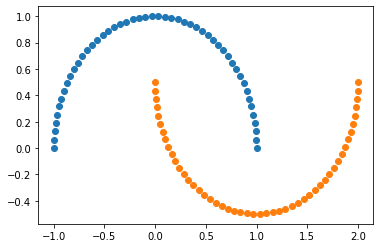

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

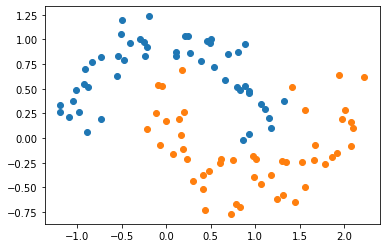

In [8]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 使用多项式特征的svm

In [11]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("svc", LinearSVC(C=C))
        
    ])

In [12]:
poly_svc = PolynomialSVC(3)
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('svc', LinearSVC())])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


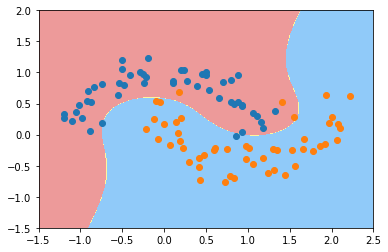

In [15]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
plot_desicion_boundry(poly_svc, [-1.5, 2.5, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# 使用多项式核函数的SVM

In [17]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernel_svc", SVC(kernel='poly', degree=degree, C=C))
    ])

In [18]:
poly_kernel_svc = PolynomialKernelSVC(3)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('kernel_svc', SVC(kernel='poly'))])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


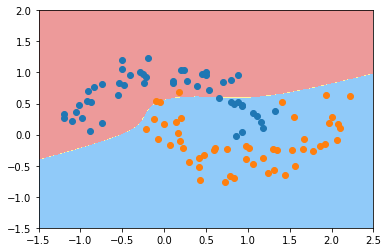

In [19]:
plot_desicion_boundry(poly_kernel_svc, [-1.5, 2.5, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()